In [19]:
import torch 
import torch.nn as nn
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
iris = fetch_ucirepo(id=53) 
  
# data (as pandas dataframes) 
X = iris.data.features 
y = iris.data.targets

In [3]:
X_tensor = torch.tensor(X.to_numpy(),dtype = torch.float32,requires_grad=True)

In [4]:
X_scaled = (X_tensor - X_tensor.min()) / (X_tensor.max() - X_tensor.min())
# or standardization
# X_scaled = (X_tensor - X_tensor.mean()) / X_tensor.std()

In [5]:
y_boolean = LabelEncoder().fit_transform(y)

C:\Users\shiva\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:120: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [6]:
y_bol_ten = torch.tensor(y_boolean,dtype = torch.float32,requires_grad=True).long()

In [7]:
y_tensor = nn.functional.one_hot(y_bol_ten,num_classes=4)

In [8]:
y_tensor = y_tensor.type(torch.float32)

In [9]:
model = nn.Sequential(nn.Linear(4, 2),
                      nn.Linear(2, 4),
                      nn.ReLU()
                     )

In [10]:
loss_object = nn.CrossEntropyLoss()

In [11]:
optimizer = torch.optim.SGD(model.parameters(),lr = 0.0001)

In [28]:
loss_list = list()
for i in range(1,100):
    optimizer.zero_grad() #each step adds to the previous gradient → huge updates → exploding loss. 
    y_pred = model(X_scaled.clone().detach())
    loss = loss_object(y_pred,X_scaled.clone().detach())
    loss_list.append(loss.item())
    loss.backward()
    optimizer.step()

In [29]:
len(loss_list)

99

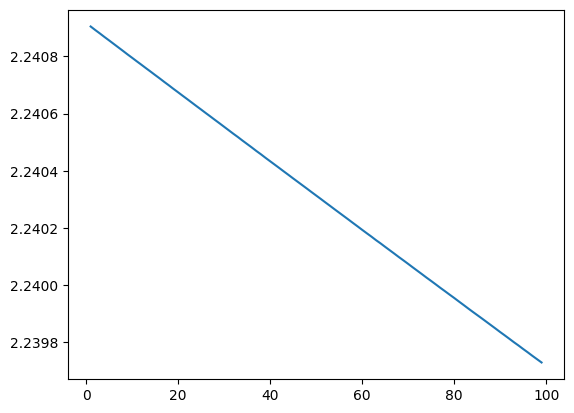

In [30]:
plt.plot(list(range(1,100)), loss_list)
plt.show()